In [4]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import cv2 
import warnings 
from PIL import Image 
warnings.filterwarnings("ignore")

In [5]:
#initialise ocr model 
ocr_model = PaddleOCR(lang='en')

[2024/08/01 13:05:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\amine/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\amine/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

# Case 1

In [49]:
#import image 
image_path = "image-data/case1.png"

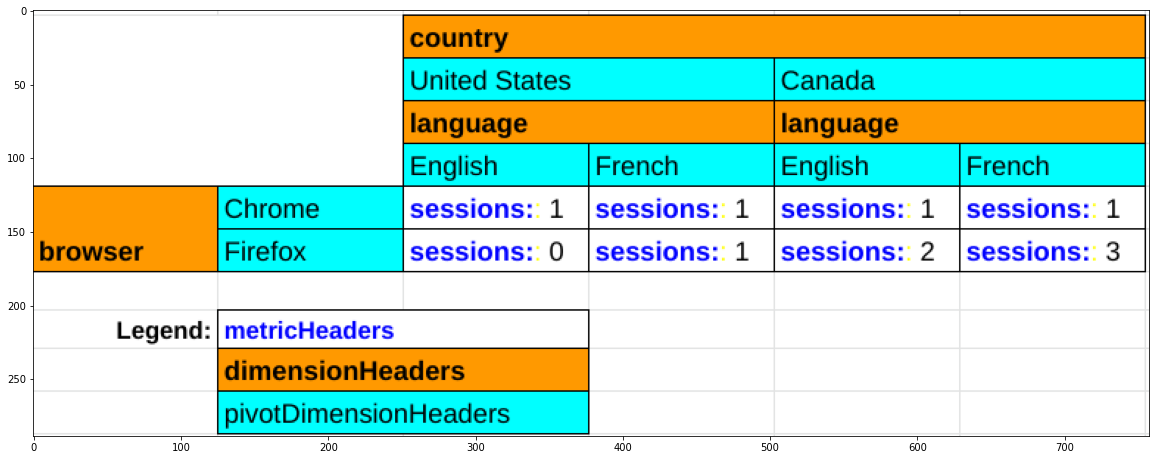

In [50]:
#display the image 
plt.figure(figsize=(20,15))
image = Image.open(image_path)
plt.imshow(image)

In [51]:
#get result 
result = ocr_model.ocr(image_path)

[2024/08/01 17:32:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/08/01 17:32:48] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.08033585548400879
[2024/08/01 17:32:49] ppocr DEBUG: rec_res num  : 24, elapsed : 1.0693538188934326


In [52]:
output = []
browser = ["Chrome" for i in range(4)] + ["Firefox" for i in range(4)]
country =["United states","United states","Canada","Canada"] * 2
language =["English" if i%2 == 0 else "Frensh" for i in range(8)]
session = []
for res in result[0] :
    find_session = res[1][0].split(":")
    if len(find_session) > 1:
        #print(find_session[-1])
        session.append(find_session[-1])
    #output.append(res[1][0])
case1 = pd.DataFrame({
    "Browser":browser,
    "Country":country,
    "Langauge":language,
    "Session":session[:8]
})
case1 

,Browser,Country,Langauge,Session
0,Chrome,United states,English,1
1,Chrome,United states,Frensh,1
2,Chrome,Canada,English,1
3,Chrome,Canada,Frensh,1
4,Firefox,United states,English,0
5,Firefox,United states,Frensh,1
6,Firefox,Canada,English,2
7,Firefox,Canada,Frensh,3


In [53]:
# save the result 
case1.to_csv("results/case1.csv")

# Case 2 

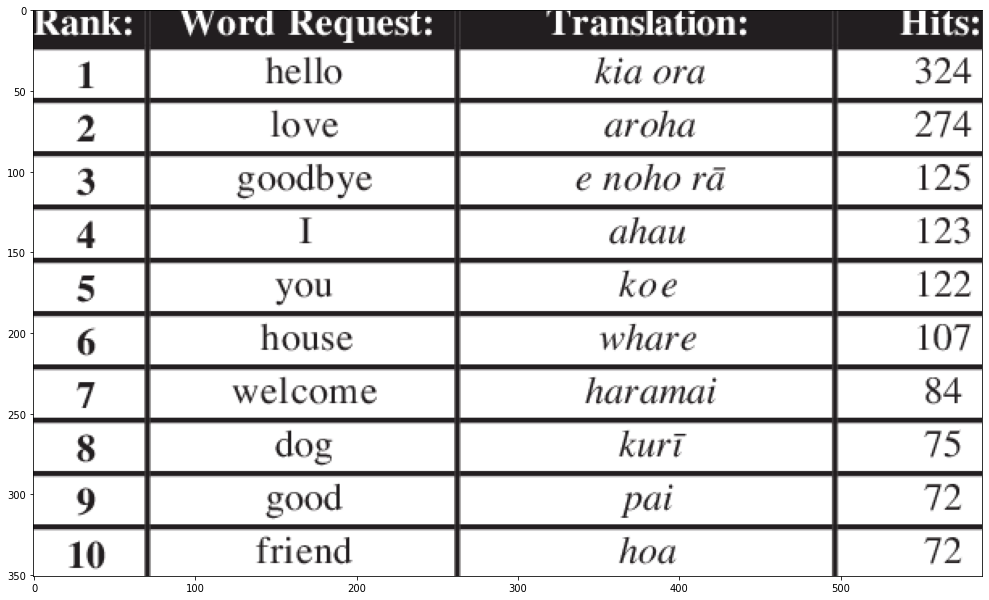

In [57]:
#img path 
image_path = "image-data/case2.png"
#display the image 
plt.figure(figsize=(17,13))
image = Image.open(image_path)
plt.imshow(image)

In [58]:
result_case2 = ocr_model.ocr(image_path)

[2024/08/01 17:36:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/08/01 17:36:09] ppocr DEBUG: dt_boxes num : 44, elapsed : 0.5299081802368164
[2024/08/01 17:36:11] ppocr DEBUG: rec_res num  : 44, elapsed : 1.9030840396881104


In [81]:
rank =[]
word_request = []
translation = []
hits = []
#word = 
for idx in range(4,len(result_case2[0]),4):
    #print(result_case2[0][idx][1][0])
    rank.append(result_case2[0][idx][1][0])
    word_request.append(result_case2[0][idx+1][1][0])
    translation.append(result_case2[0][idx+2][1][0])
    hits.append(result_case2[0][idx+3][1][0])
case2 = pd.DataFrame({
    "Rank":rank,
    "Word_Request":word_request,
    "Translation":translation,
    "Hits":hits
})
case2

,Rank,Word_Request,Translation,Hits
0,1,hello,kia ora,324
1,2,love,aroha,274
2,3,goodbye,e noho ra,125
3,4,1,ahau,123
4,5,you,koe,122
5,6,house,whare,107
6,7,welcome,haramai,84
7,8,dog,kuri,75
8,9,good,pai,72
9,10,friend,hoa,72


In [76]:
#save case 2 
case2.to_csv("results/case2.csv")

# Case 3 (same as case 2, but using a colored image)

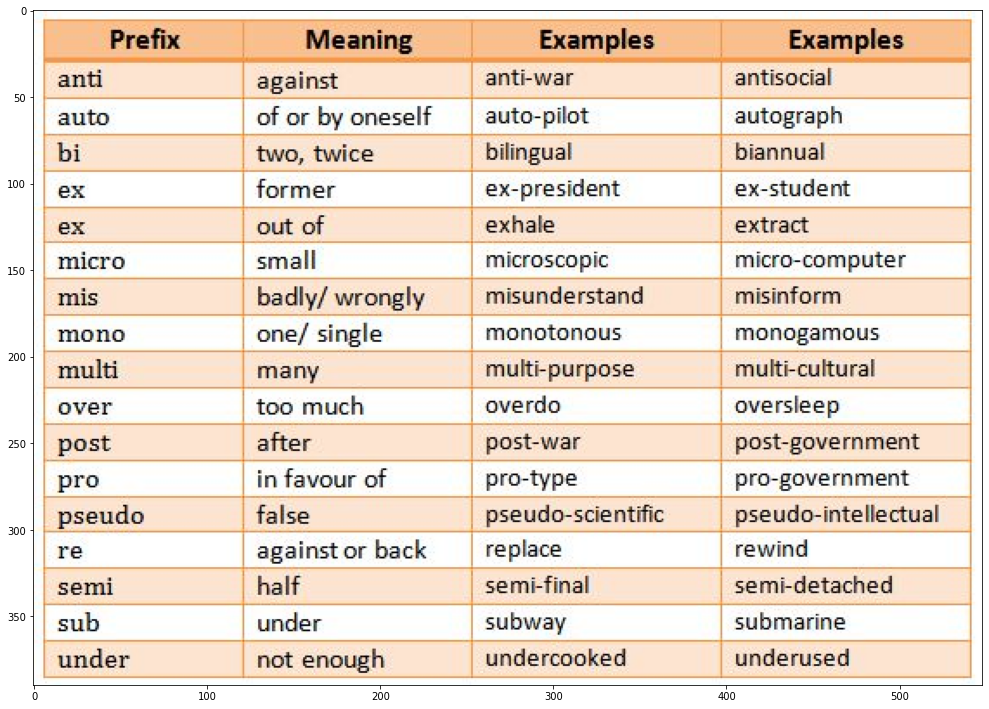

In [78]:
#img path  (colored image)
image_path = "image-data/case3.jpg"
#display the image 
plt.figure(figsize=(17,13))
image = Image.open(image_path)
plt.imshow(image)

In [79]:
result_case3 = ocr_model.ocr(image_path)

[2024/08/01 17:49:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/08/01 17:49:41] ppocr DEBUG: dt_boxes num : 72, elapsed : 0.5471909046173096
[2024/08/01 17:49:44] ppocr DEBUG: rec_res num  : 72, elapsed : 3.256190776824951


In [82]:
Prefix =[]
Meaning = []
Example1 = []
Example2 = []
#word = 
for idx in range(4,len(result_case3[0]),4):
    #print(result_case2[0][idx][1][0])
    Prefix.append(result_case3[0][idx][1][0])
    Meaning.append(result_case3[0][idx+1][1][0])
    Example1.append(result_case3[0][idx+2][1][0])
    Example2.append(result_case3[0][idx+3][1][0])
case3 = pd.DataFrame({
    "Prefix":Prefix,
    "Meaning":Meaning,
    "Example1":Example1,
    "Example2":Example2
})
case3

,Prefix,Meaning,Example1,Example2
0,anti,against,anti-war,antisocial
1,auto,of or by oneself,auto-pilot,autograph
2,bi,"two,twice",bilingual,biannual
3,ex,former,ex-president,ex-student
4,ex,out of,exhale,extract
5,micro,small,microscopic,micro-computer
6,mis,badly/wrongly,misunderstand,misinform
7,mono,one/single,monotonous,monogamous
8,multi,many,multi-purpose,multi-cultural
9,over,too much,overdo,oversleep


In [84]:
case3.to_csv("results/case3.csv")

# Case 4 

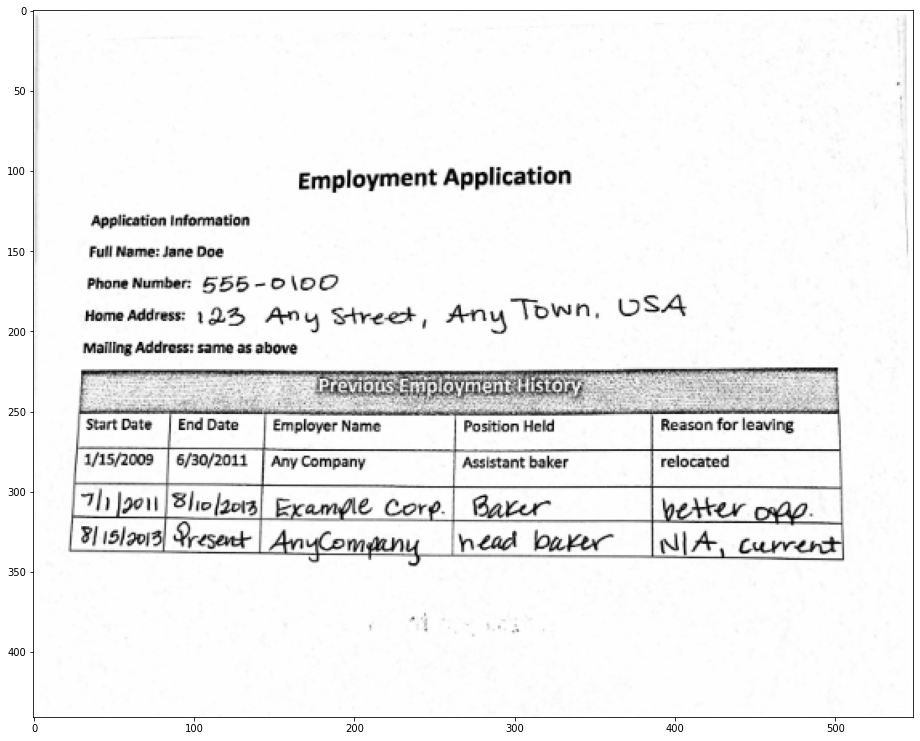

In [85]:
#img path  (colored image)
image_path = "image-data/case4.png"
#display the image 
plt.figure(figsize=(17,13))
image = Image.open(image_path)
plt.imshow(image)

In [86]:
result_case4 = ocr_model.ocr(image_path)

[2024/08/01 18:07:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/08/01 18:07:58] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.5217854976654053
[2024/08/01 18:07:59] ppocr DEBUG: rec_res num  : 24, elapsed : 1.5513381958007812


In [87]:
for res in result_case4[0]:
    print(res[1][0])

Employment Application
Application Informationd
Full Name: Jane Doe
Phone Number555-0\
Malling Address: same as above
Previous Employment History
Start Date
End Date
Employer Name
Position Held
Reason for leaving
1/15/2009
6/30/2011
Any Company
Assistant baker
relocated
81102013
Examale Corp.
Barer
betteroe.
8/15/013PresentAnyComyany
nead barer
NAcurrent
